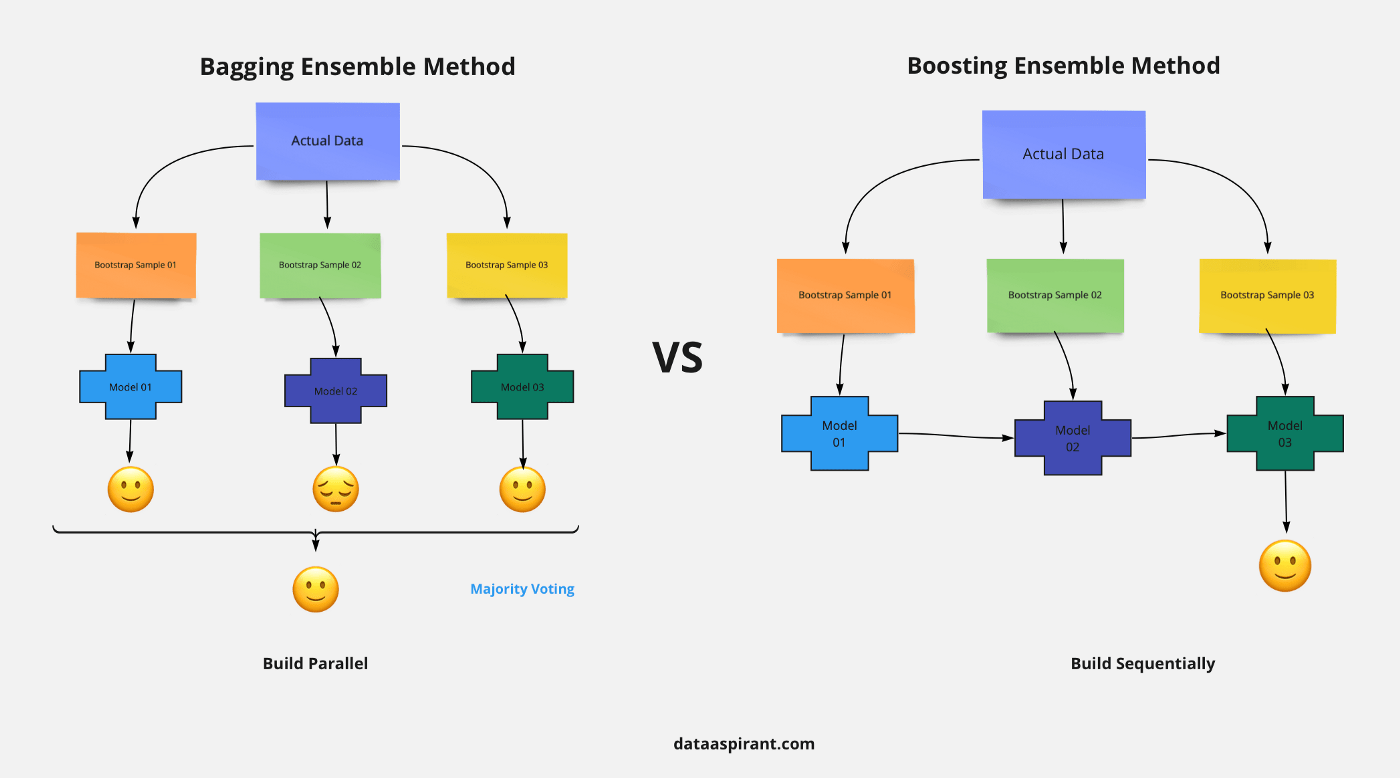

In [92]:
import pandas as pd
import numpy as np

In [93]:
df=pd.read_csv('bank-marketing.csv')

In [94]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [95]:
df.isna().sum().sum()

0

In [96]:
df.Class.value_counts()

1    39922
2     5289
Name: Class, dtype: int64

In [97]:
df.shape

(45211, 17)

In [98]:
df.V2.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: V2, dtype: int64

In [99]:
df.V3.value_counts()

married     27214
single      12790
divorced     5207
Name: V3, dtype: int64

In [100]:
df.V4.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: V4, dtype: int64

In [101]:
df.V14.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: V14, Length: 559, dtype: int64

In [102]:
problem_type = 'Classification'
# problem_type = 'Regression'
target='Class'

In [103]:
def check_columns_type_with_Nan_replace(X, column):
            # need to define int column with NaN(should be float type)
            X[column] = X[column].fillna(0)
            count_int = 0
            lenth = len(X[column])


            for i in X[column]:
                try:
                    if i%1 == 0:
                        count_int +=1
                except:
                    continue
            if count_int == lenth:
                
                X[column]=X[column].astype(int)
            return X[column]

In [104]:
def define_columns_type(X):
    high_card_features_ls = []
    cat_features_ls = []
    num_features_ls = []
    
    X = pd.DataFrame.copy(X)
    for column in X.columns:     
            # if number of unique values more than 63, that column should be categorical
            # if column numerical
            if (X[column].dtype in [int, float]):
                
                
                # try to replace Nan and check column type
                X[column] = check_columns_type_with_Nan_replace(X, column)
                #check if column 'int'
                if X[column].dtype in [int]:
                    if X[column].nunique()>60:
                        num_features_ls.append(column)
                    else:
                        cat_features_ls.append(column)

                else:
                    num_features_ls.append(column)

            # check object columns   
            elif (X[column].nunique()>60):
                num_features_ls.append(column)
            else:
                cat_features_ls.append(column)
    return cat_features_ls, num_features_ls

In [105]:
cat_features_ls, num_features_ls =  define_columns_type(df.drop(columns=target))

In [106]:
cat_features_ls

['V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V15', 'V16']

In [84]:
num_features_ls

['V1', 'V6', 'V12', 'V14']

In [85]:
df_1 = pd.get_dummies(df, columns = cat_features_ls)

In [123]:
df_1.head()

,V1,V6,V12,V14,Class,V2_admin.,V2_blue-collar,V2_entrepreneur,V2_housemaid,V2_management,...,V15_40,V15_41,V15_51,V15_55,V15_58,V15_275,V16_failure,V16_other,V16_success,V16_unknown
0,58,2143,261,-1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,44,29,151,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,2,76,-1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47,1506,92,-1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,33,1,198,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
def target_preprocessing(df, target, problem_type):

    # drop records when target is missing
    df = df[df[target].notnull()]
    le = 'None'
    if problem_type != 'Regression':
        le = LabelEncoder()
        df[target] = le.fit_transform(df[target].astype(str))       
    return df

In [122]:
df_1=target_preprocessing(df_1, 'Class', 'Classification')

In [87]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [111]:
num_features_ls

['V1', 'V6', 'V12', 'V14']

In [112]:
def encode(X):
    num_features_ls = ['V1', 'V6', 'V12', 'V14']
    encoder = LabelEncoder()
    column_encoder_dict = {}
    
    for column in X.drop(num_features_ls, axis=1).columns:
            encoder = LabelEncoder()
            encoder.fit(X[column])
            column_encoder_dict[column] = encoder
    
    new_ls = list(set(X.columns)&set(num_features_ls))
    
    for column in X.drop(new_ls, axis=1).columns:
            X[column]= column_encoder_dict[column].transform(X[column])


    return X

In [113]:
df_2=encode(df)

In [114]:
df_2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,4,1,2,0,2143,1,0,2,4,8,261,0,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,4,8,151,0,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,4,8,76,0,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,4,8,92,0,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,4,8,198,0,-1,0,3,0


In [124]:
df_1.Class.value_counts()

0    39922
1     5289
Name: Class, dtype: int64

In [118]:
df_1.isna().sum().sum()

0

In [125]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [127]:
x1 = df_1.drop(columns=target)
y1 = df_1[target]
        
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, shuffle = True,
                                                        random_state=42, stratify=y1)

x2 = df_2.drop(columns=target)
y2 = df_2[target]
        
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, shuffle = True,
                                                        random_state=42, stratify=y2)

In [133]:
from xgboost import XGBClassifier

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [136]:
model = XGBClassifier()
score = cross_val_score(model, x_train1, y_train1, n_jobs=-1, cv=5, scoring="average_precision")
pr = score.mean()

In [137]:
pr

0.6095496478692486

In [156]:
model.fit(x_train2, y_train2)

C:\Users\George Ch\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
y_pred_2 = model.predict(x_test2)

In [158]:
print(model.score(x_test2, y_pred_2))

1.0


In [150]:
y_pred_1

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
from sklearn.metrics import recall_score, precision_score

In [151]:
recall = recall_score(y_test1, y_pred_1)

In [152]:
recall

0.46502835538752363

In [162]:
precision_score = precision_score(y_test2, y_pred_2)

In [163]:
precision_score

0.6270543615676359

In [138]:
model = XGBClassifier()
score = cross_val_score(model, x_train2, y_train2, n_jobs=-1, cv=5, scoring="average_precision")
pr2 = score.mean()

In [139]:
pr2

0.6100329015983821

In [165]:
import optuna
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

In [168]:
def objective(trial):
    # XGBoost parameters
    params = {
        "verbosity": 0,  # 0 (silent) - 3 (debug)
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.09),
        "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.6),
        "subsample": trial.suggest_loguniform("subsample", 0.4, 0.8),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 10.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "gamma": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 10, 1000)
    }

    model = XGBClassifier(**params)
    score = model_selection.cross_val_score(model, x_train1, y_train1, n_jobs=-1, cv=5, scoring="average_precision")
    accuracy = score.mean()
    return accuracy

In [ ]:
pruner = optuna.pruners.HyperbandPruner()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=30, timeout=1800)

[I 2021-12-22 20:45:09,361] A new study created in memory with name: no-name-d7f38fb2-3390-41b3-88ca-942c24fc30a3
